In [88]:
#Prepare to analyze csv files with matplotlib and pandas
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [2]:
# connect the csv files
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [3]:
#Create the Data Frames from the csv files
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
#Check the first 10 rows of City Data
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
#Check the first 10 rows of Ride Data
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
#Inspect City Data:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
#How many data points are there for each type of city?
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
sum(city_data_df["type"]=="Urban")

66

In [11]:
sum(city_data_df["type"]=="Suburban")

36

In [12]:
sum(city_data_df["type"]=="Rural")

18

In [13]:
#Inspect Ride Data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
#Merge the DataFrames based on City (the only column shared)
pyber_data_df=pd.merge(ride_data_df, city_data_df, how = "left", on=["city", "city"])

pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [17]:
pyber_data_df.tail(10)

,city,date,fare,ride_id,driver_count,type
2365,Lake Jamie,2019-04-19 04:32:47,16.29,3518682119233,4,Rural
2366,North Holly,2019-03-18 10:38:05,40.34,3787775176860,8,Rural
2367,Michaelberg,2019-01-27 18:43:05,38.42,862622008020,6,Rural
2368,Lake Jamie,2019-04-29 01:58:44,54.22,2489264790267,4,Rural
2369,Bradshawfurt,2019-01-30 10:55:23,51.39,1328274868072,7,Rural
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


In [18]:
# Create Data Frames for each Type of city
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [20]:
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [21]:
#Use groupby() to get the number of rides for each city
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [22]:
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [23]:
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [24]:
#Use groupby() to get the average fare for each city.
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [25]:
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [26]:
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [27]:
#Use groupby() to get the average number of drivers for each city type
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [28]:
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

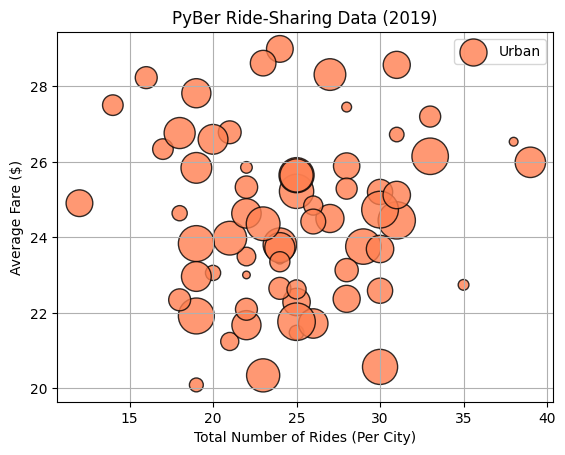

In [29]:
#Create the Urban Scatter Plot with x-axis as the Ride Count and y-axis as the Average Fare
plt.scatter(urban_ride_count, urban_avg_fare, color="coral", alpha=.8, 
            edgecolor="black",s=urban_driver_count*10,linewidths=1, 
            label = "Urban")
plt.xlabel ("Total Number of Rides (Per City)")
plt.ylabel ("Average Fare ($)")
plt.title ("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend ()
plt.show()

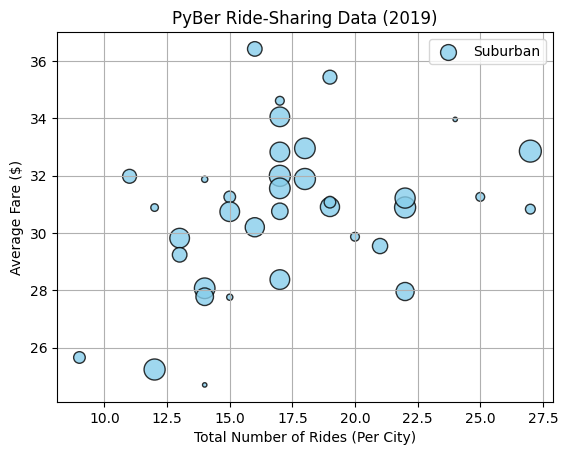

In [30]:
plt.scatter(suburban_ride_count, suburban_avg_fare, color="skyblue", alpha=.8, 
            edgecolor="black", s = suburban_driver_count*10, linewidths=1, 
            label = "Suburban")
plt.xlabel ("Total Number of Rides (Per City)")
plt.ylabel ("Average Fare ($)")
plt.title ("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend ()
plt.show()

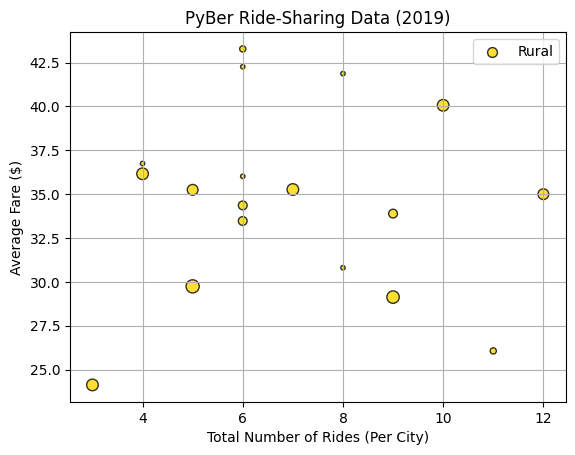

In [31]:
plt.scatter(rural_ride_count, rural_avg_fare, color="gold", alpha=.8, 
            edgecolor="black", s = rural_driver_count*10, linewidths=1, 
            label = "Rural")
plt.xlabel ("Total Number of Rides (Per City)")
plt.ylabel ("Average Fare ($)")
plt.title ("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend ()
plt.show()

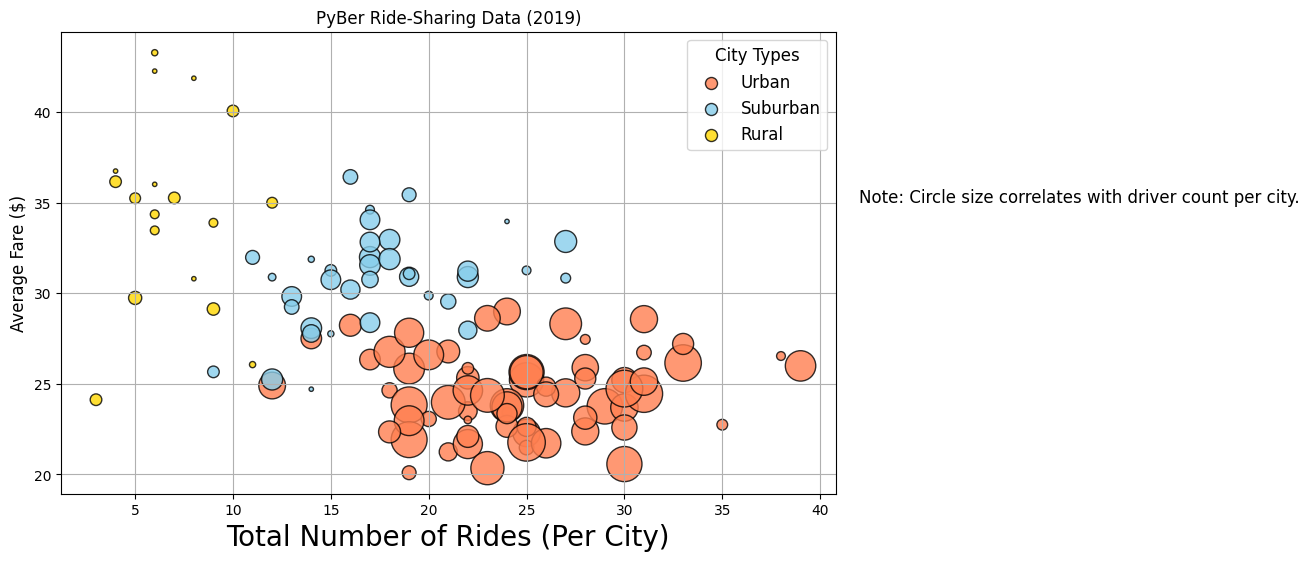

<Figure size 640x480 with 0 Axes>

In [32]:
#Expand the size of the chart
plt.subplots(figsize=(10, 6))

#Combine all the Bubble Charts. Enter the scatter codes together in one cell.
plt.scatter(urban_ride_count, urban_avg_fare, color="coral", alpha=.8, 
            edgecolor="black",s=urban_driver_count*10,linewidths=1, 
            label = "Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, color="skyblue", alpha=.8, 
            edgecolor="black", s = suburban_driver_count*10, linewidths=1, 
            label = "Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, color="gold", alpha=.8, 
            edgecolor="black", s = rural_driver_count*10, linewidths=1, 
            label = "Rural")

#Add all the other details
plt.xlabel ("Total Number of Rides (Per City)", fontsize=20)
plt.ylabel ("Average Fare ($)", fontsize=12)
plt.title ("PyBer Ride-Sharing Data (2019)", fontsize=12)
plt.grid(True)

#Configure the legend
plt.legend ()
lgnd=plt.legend (fontsize = "12", mode="Expanded", scatterpoints = 1, loc = "best", title = "City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)

#Make a Note for the side of the chart
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12", wrap=True)

plt.show()

#Save the figure as a png in the "analysis" folder
plt.savefig("analysis/Fig1.png")

In [33]:
#Get statistics on each city type
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [34]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [35]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [36]:
#Get summary statistics on each city type's ride count
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [37]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [38]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [39]:
#Get the mean ride count for each city type, rounded of course
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [40]:
#Get the mean avg fare for each city type
round(urban_avg_fare.mean(), 2), round(suburban_avg_fare.mean(), 2), round(rural_avg_fare.mean(), 2)

(24.5, 30.74, 34.64)

In [41]:
#Get the median values as well
urban_ride_count.median(), round(urban_avg_fare.median(), 2), suburban_ride_count.median(), round(suburban_avg_fare.median(), 2), rural_ride_count.median(), round(rural_avg_fare.median(), 2)

(24.0, 24.48, 17.0, 30.9, 6.0, 35.12)

In [42]:
#Get the mode ride counts by city type
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [43]:
# Get NumPy and SciPy environments and use central tendencies with that
import numpy as np
import scipy.stats as sts

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts fur urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts fur urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [44]:
sts.mode(suburban_ride_count)

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [45]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [46]:
#Build average fares for each city type
urban_fares = urban_cities_df["fare"]
urban_fares.describe()

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [47]:
avg_urban_fares = np.mean(urban_fares)
med_urban_fares = np.median(urban_fares)
mode_urban_fares=sts.mode(urban_fares)

round(avg_urban_fares, 2), med_urban_fares, mode_urban_fares

(24.53, 24.64, ModeResult(mode=array([22.86]), count=array([5])))

In [48]:
suburban_fares=suburban_cities_df["fare"]
avg_suburban_fares=np.mean(suburban_fares)
med_suburban_fares=np.median(suburban_fares)
mode_suburban_fares=sts.mode(suburban_fares)

round(avg_suburban_fares, 2), med_suburban_fares, mode_suburban_fares

(30.97, 30.75, ModeResult(mode=array([17.99]), count=array([3])))

In [49]:
rural_fares=rural_cities_df["fare"]
avg_rural_fares=np.mean(rural_fares)
med_rural_fares=np.median(rural_fares)
mode_rural_fares=sts.mode(rural_fares)

round(avg_rural_fares, 2), med_rural_fares, mode_rural_fares

(34.62, 37.05, ModeResult(mode=array([37.05]), count=array([2])))

In [50]:
#Get all the stats for Numbers of Drivers by city type
urban_drivers=urban_cities_df["driver_count"]
avg_urban_drivers=np.mean(urban_drivers)
med_urban_drivers=np.median(urban_drivers)
mode_urban_drivers=sts.mode(urban_drivers)

round(avg_urban_drivers, 0), med_urban_drivers, mode_urban_drivers

(37.0, 37.0, ModeResult(mode=array([39], dtype=int64), count=array([86])))

In [51]:
suburban_drivers=suburban_cities_df["driver_count"]
avg_suburban_drivers=np.mean(suburban_drivers)
med_suburban_drivers=np.median(suburban_drivers)
mode_suburban_drivers=sts.mode(suburban_drivers)

round(avg_suburban_drivers, 0), med_suburban_drivers, mode_suburban_drivers

(14.0, 16.0, ModeResult(mode=array([20], dtype=int64), count=array([79])))

In [52]:
rural_drivers=rural_cities_df["driver_count"]
avg_rural_drivers=np.mean(rural_drivers)
med_rural_drivers=np.median(rural_drivers)
mode_rural_drivers=sts.mode(rural_drivers)

round(avg_rural_drivers, 0), med_rural_drivers, mode_rural_drivers

(4.0, 4.0, ModeResult(mode=array([1], dtype=int64), count=array([32])))

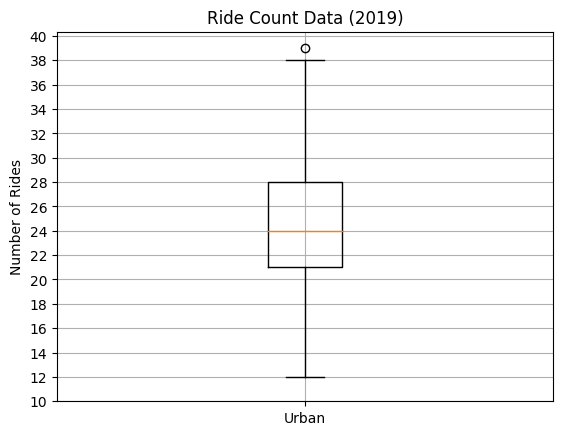

In [53]:
#Create a Box and Whisker Plot for Ride Count Data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

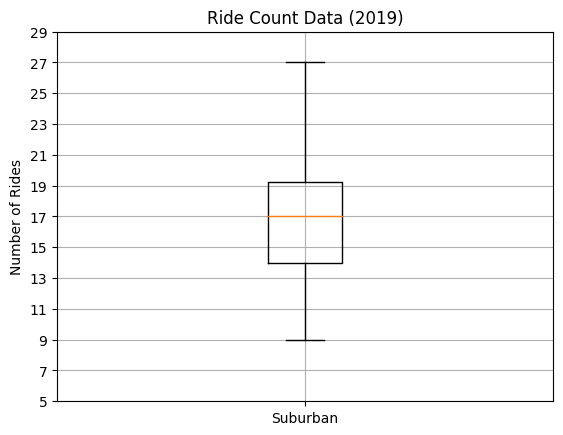

In [54]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(5,30, step=2.0))
ax.grid()
plt.show()

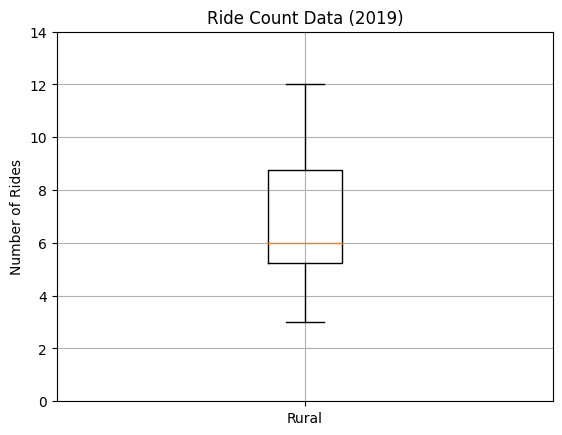

In [55]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0,15, step=2.0))
ax.grid()
plt.show()

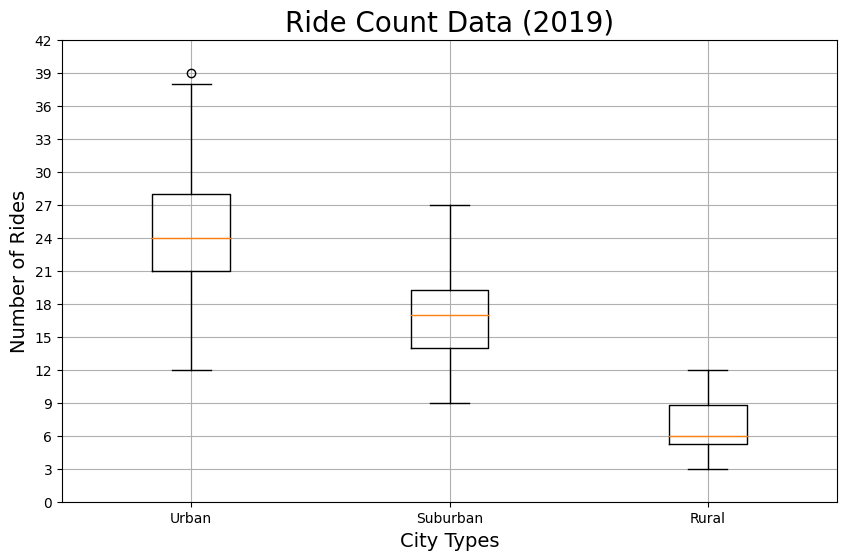

In [56]:
#Put all 3 on the same chart
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax=plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

plt.savefig("analysis/Fig2.png")
plt.show()

In [57]:
#Find the outlier city for Urban rides
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
urban_city_outlier

'West Angela'

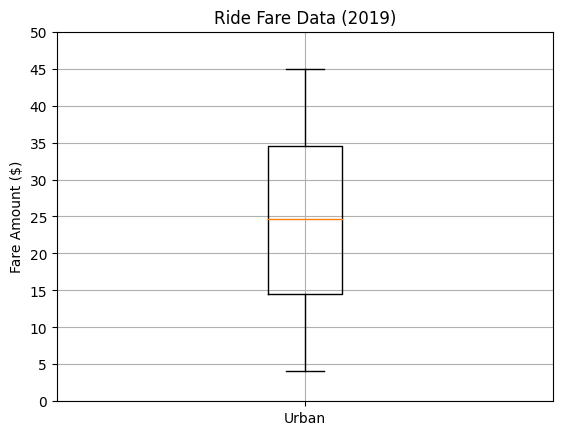

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [58]:
#Ride Fare Data Box and Whisker Plots
x_labels=["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare Amount ($)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

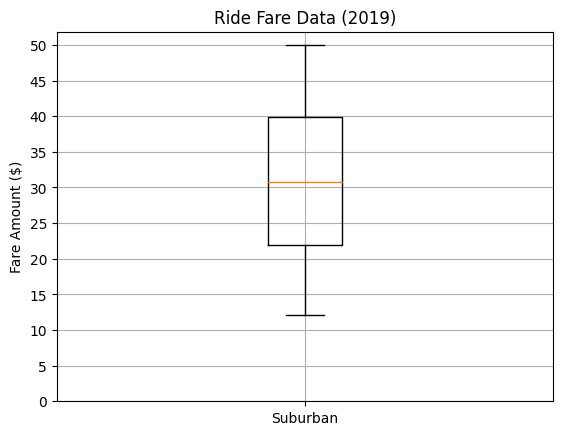

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [59]:
x_labels=["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare Amount ($)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

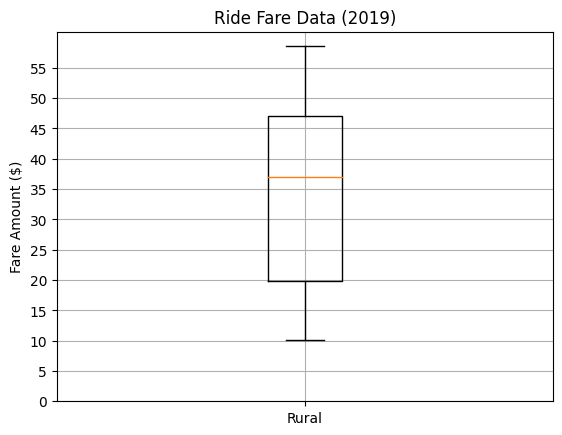

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [60]:
x_labels=["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare Amount ($)")
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

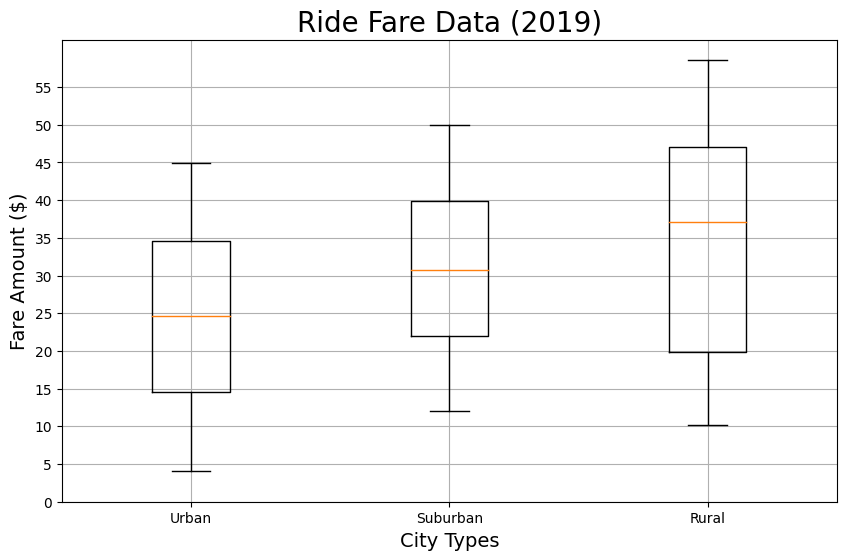

In [61]:
x_labels=["Urban", "Suburban", "Rural"]
fare_data=[urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_data, labels=x_labels) 
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare Amount ($)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,60, step=5.0))
ax.grid()

plt.savefig("analysis/Fig3.png")
plt.show()

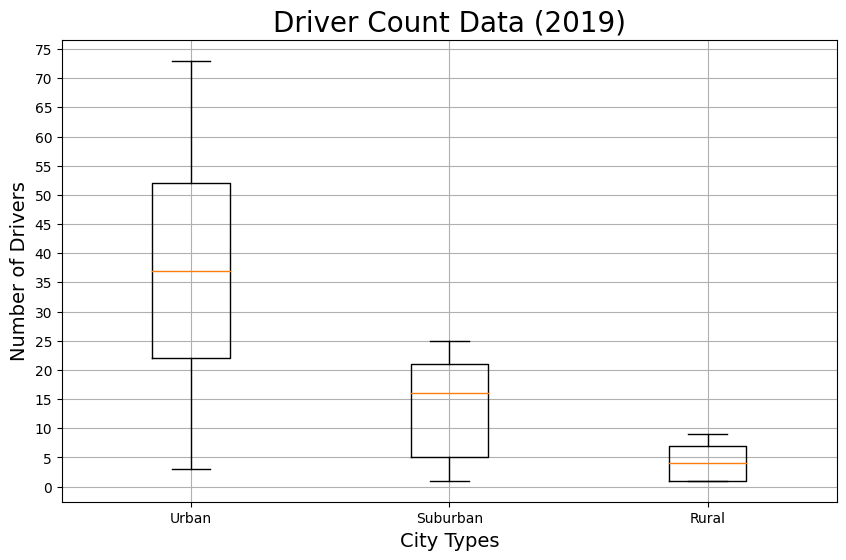

In [62]:
#Repeat the process for Driver Counts
x_labels=["Urban", "Suburban", "Rural"]
driver_data=[urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_data, labels=x_labels) 
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()

plt.savefig("analysis/Fig4.png")
plt.show()

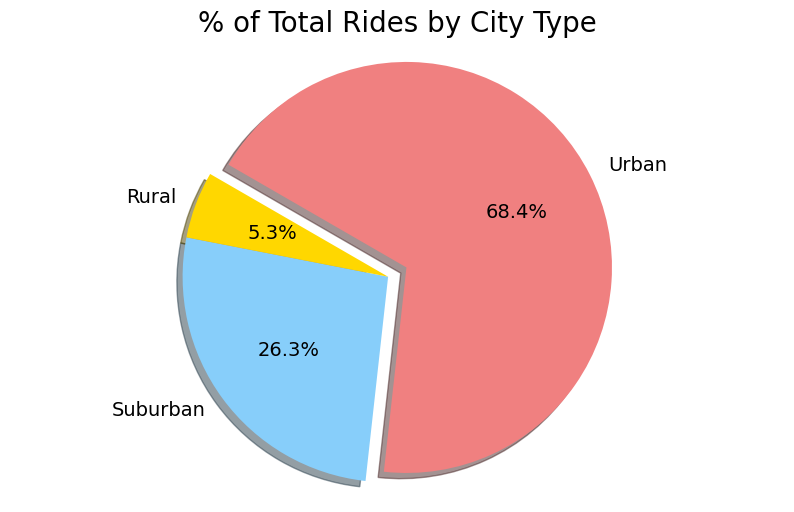

In [90]:
plt.subplots(figsize=(10,6))
x_axis=[urban_ride_count.sum(), suburban_ride_count.sum(), rural_ride_count.sum()]

colors=["lightcoral", "lightskyblue", "gold"]
explode=[.1, 0, 0]

plt.pie(x_axis, labels=x_labels, autopct="%.1f%%", colors=colors, shadow=True, explode=explode, startangle=150, counterclock=False)

plt.axis('equal')
plt.title("% of Total Rides by City Type", fontsize=20)
mpl.rcParams['font.size']=14

plt.savefig("analysis/Fig6.png")
plt.show()

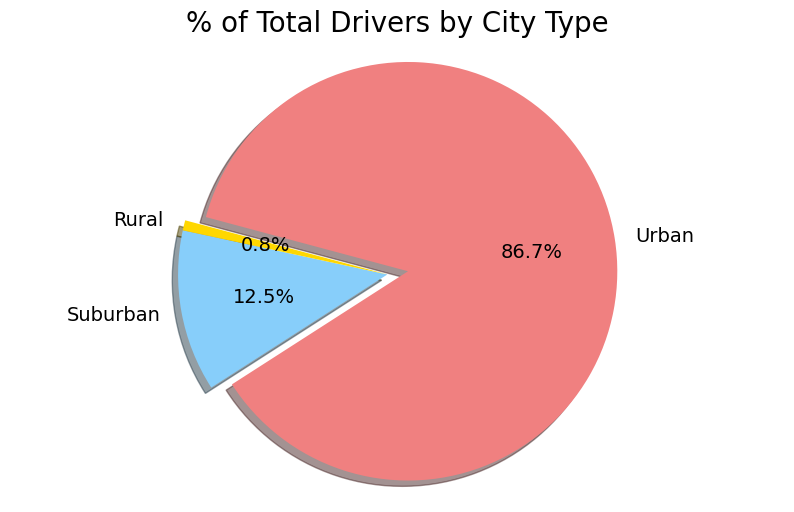

In [94]:
plt.subplots(figsize=(10,6))
x_axis2=[urban_drivers.sum(), suburban_drivers.sum(), rural_drivers.sum()]

colors=["lightcoral", "lightskyblue", "gold"]
explode=[.1, 0, 0]

plt.pie(x_axis2, labels=x_labels, autopct="%.1f%%", colors=colors, shadow=True, explode=explode, startangle=165, counterclock=False)

plt.axis('equal')
plt.title("% of Total Drivers by City Type", fontsize=20)
mpl.rcParams['font.size']=14

plt.savefig("analysis/Fig7.png")
plt.show()